### **Calculating the Signal in an RC Circuit Excited by a Square Wave**

This code calculates the expected signal from a linear RC circuit excited by a square wave. Specifically, we measure the **voltage across the resistor**, which is proportional to the circuit current.

---

### **Step 1: Response to a Single Sine Wave**

For a simple sine wave input, we can represent the signal in complex space as the imaginary part of an exponential:

$$
V_{\text{in}}(t) = \mathrm{Im} \left( V_0 e^{j\omega t} \right)
$$

where $j = \sqrt{-1}$.  
For a given frequency $\omega$, the current through the circuit is determined by the impedance $Z(\omega)$. Using Ohm’s law, the current is:

$$
I(t) = \mathrm{Im} \left( \frac{V_0 e^{j\omega t}}{Z(\omega)} \right)
$$

---

### **Step 2: Square Wave Representation**

A square wave can be written as a sum of sine waves using a Fourier series. The series representation is:

$$
V(t) = V_0 \sum_{i=0}^\infty \frac{4}{(2i+1)\pi} \sin\left( \frac{2\pi(2i+1)t}{T} \right)
$$

Here:
- $T$ is the period of the square wave.
- $i$ represents the index of each harmonic.

Alternatively, this can be expressed as the **imaginary part** of a complex exponential sum:

$$
V(t) = \mathrm{Im} \left[ V_0 \sum_{i=0}^\infty \frac{4}{(2i+1)\pi} \exp\left( j \frac{2\pi(2i+1)t}{T} \right) \right]
$$

---

### **Step 3: Simplifying the Fourier Series**

We can rewrite the square wave in terms of the harmonic frequencies $\omega_i = \frac{2\pi(2i+1)}{T}$ and their corresponding amplitudes $A_i = \frac{4}{(2i+1)\pi}$. This gives:

$$
V(t) = \mathrm{Im} \left[ V_0 \sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

---

### **Step 4: Current Response in the RC Circuit**

For an RC circuit, the impedance is given by:

$$
Z(\omega) = R + \frac{1}{j\omega C}
$$

The current through the circuit can then be calculated as:

$$
I(t) = \frac{V(t)}{Z(\omega)}
$$

Substituting the Fourier series for $V(t)$, we find:

$$
I(t) = \mathrm{Im} \left[ \frac{V_0}{R + \frac{1}{j\omega C}} \sum_{i=0}^\infty A_i e^{j\omega_i t} \right]
$$

---

### **Summary**

This formulation allows us to calculate the output current $I(t)$ for an RC circuit excited by a square wave. By summing over all Fourier components of the input signal, we capture both the amplitude attenuation and phase shifts introduced by the circuit for each harmonic.




In [2]:
import numpy as  np
import scipy.constants as scc
from matplotlib import pyplot as plt
# these happen to be the component values I have on hand
C = 39000*scc.pico
R = 47*scc.kilo
tau = R*C 
print(f'RC time constant = {tau:5.2e} s')

RC time constant = 1.83e-03 s


C:\Users\th0lxl1\AppData\Local\Temp\ipykernel_24412\3348245050.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


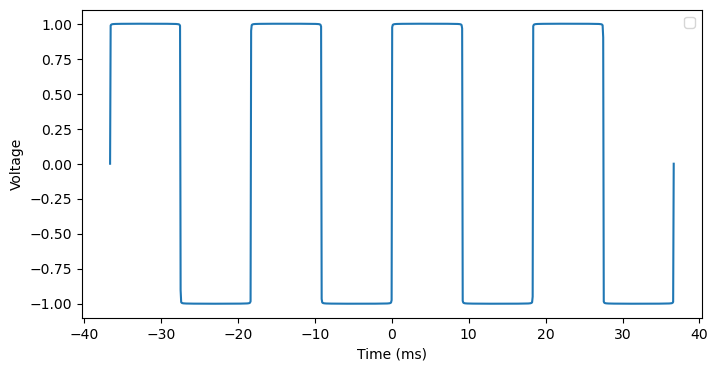

In [3]:
# Parameters
N = 1000                # Number of Fourier terms
T = tau * 5            # Period of the square wave
harmonic_index = np.arange(N)  # Array of harmonic indices (0 to N-1)

# Fourier series components
omega = ((2 * harmonic_index + 1) * scc.pi / T)[:,None]  # Angular frequencies
amplitudes = 4 / ((2 * harmonic_index + 1) * scc.pi)[:,None]         # Fourier amplitudes

# Time domain: 4 periods before and after 0
time = np.linspace(-4 * T, 4 * T, 1000)

# Vectorized Fourier series calculation
V = np.sum(amplitudes * np.exp(1j * omega * time), axis=0)

# Plot the imaginary part of the square wave
plt.figure(figsize=(8, 4))
plt.plot(time/scc.milli, np.imag(V))
plt.xlabel("Time (ms)")
plt.ylabel("Voltage")
plt.legend()


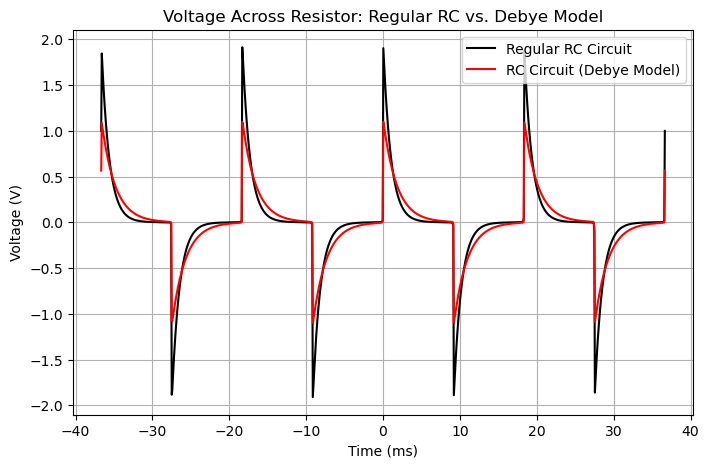

In [6]:
# Parameters
R = 1000  # Resistance in ohms
C = 1e-6  # Capacitance in farads
tau_d = 0.75 * scc.milli  # Debye relaxation time in seconds

# Precompute terms to avoid redundancy
amplitude_exp = amplitudes * np.exp(1j * omega * time)  # Combine amplitudes and exp_term

# Impedance for the regular RC circuit
Z = R - 1j / omega / C  # Impedance for each frequency component
V_resistor = R * np.sum(amplitude_exp / Z, axis=0)  # Voltage across resistor (regular RC)

# Impedance for the Debye model
C_d = C / (1 + 1j * omega * tau_d)  # Debye capacitance
Zd = R - 1j / omega / C_d           # Impedance for Debye model
V_resistor_d = R * np.sum(amplitude_exp / Zd, axis=0)  # Voltage across resistor (Debye RC)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(time / scc.milli, np.imag(V_resistor), '-k', label="Regular RC Circuit")
plt.plot(time / scc.milli, np.imag(V_resistor_d), '-r', label="RC Circuit (Debye Model)")
plt.xlabel("Time (ms)")  # Time in milliseconds
plt.ylabel("Voltage (V)")  # Voltage in volts
plt.title("Voltage Across Resistor: Regular RC vs. Debye Model")
plt.legend()
plt.grid()
plt.show()

